In [ ]:
import yfinance as yf 
import pandas as pd 
import math 
import pandas as pd 
from sklearn.svm import SVR
import  matplotlib.pyplot as plt
import markdown 
import plotly.express as px
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = yf.download("AAPL",start="2023-01-01",end="2024-07-05")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560883,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800


In [ ]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200
2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800


In [ ]:
pd.to_datetime(df.index)

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2024-06-20', '2024-06-21', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01',
               '2024-07-02', '2024-07-03'],
              dtype='datetime64[ns]', name='Date', length=377, freq=None)

In [ ]:
df.loc[(df['Close'] >= df['Open'])]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560883,87754700
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661789,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.399261,69458900
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.658875,57809700
2023-01-17,134.830002,137.289993,134.130005,135.940002,134.829239,63646600
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900


In [ ]:

px.line(df.loc[(df['Close'] >= df['Open'])],
        x=df.loc[(df['Close'] >= df['Open'])].index,
        y=['Close','Open'],
        title=('Close > Open'))

In [ ]:
px.line(df.loc[(df['Open'] >= df['Close'])],
        x=df.loc[(df['Open'] >= df['Close'])].index,
        y=['Close','Open'],
        title="Open > Close")

In [ ]:
df['Return']= df['Close'] - df['Open']
traces = []

# Loop through the data to create traces
for i in range(1, len(df)):
    # Determine color based on positive or negative return
    color = 'blue' if df['Return'].iloc[i] > 0 else 'red'
    
    # Create a trace for each segment
    trace = go.Scatter(x=df.index[i-1:i+1], y=df['Return'].iloc[i-1:i+1], mode='lines', line=dict(color=color))
    traces.append(trace)

# Create the figure
fig = go.Figure(traces)

# Update layout
fig.update_layout(title='Daily Returns', xaxis_title='Date', yaxis_title='Return (%)')

# Show the plot
fig.show()

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,-5.209999
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,-0.529999
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,-2.110001
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560883,87754700,3.609993
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,-0.320007


In [ ]:
plt.figure(figsize=(15,8))
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df.Open,
    close=df.Close,
    high=df.High,
    low = df.Low,

)])

fig.update_layout(
    title='AAPL Candlestick Chart (2020-2024)',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)
fig.show() 

<Figure size 1500x800 with 0 Axes>

In [ ]:
df['day'] = df.index.day

In [ ]:
df['month'] = df.index.month

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,day,month
Date,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,-5.209999,3,1
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,-0.529999,4,1
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,-2.110001,5,1
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560883,87754700,3.609993,6,1
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,-0.320007,9,1


In [ ]:
train = df.loc[df.index <= '2024-03-01']

In [ ]:
test = df.loc[df.index >='2024-03-02']

In [ ]:
test.head()

,Open,High,Low,Close,Adj Close,Volume,Return,day,month
Date,,,,,,,,,
2024-03-04,176.149994,176.899994,173.789993,175.100006,174.862823,81510100,-1.049988,4,3
2024-03-05,170.759995,172.039993,169.619995,170.119995,169.889572,95132400,-0.639999,5,3
2024-03-06,171.059998,171.240005,168.679993,169.119995,168.890915,68587700,-1.940002,6,3
2024-03-07,169.149994,170.729996,168.490005,169.000000,168.771088,71765100,-0.149994,7,3
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.498734,76114600,1.729996,8,3


In [ ]:
print('test:',test.shape,
      'train:',train.shape)

test: (85, 9) train: (292, 9)


In [ ]:
x_train = train[['day','month']]
y_train = train['Adj Close']
print(x_train,y_train)

            day  month
Date                  
2023-01-03    3      1
2023-01-04    4      1
2023-01-05    5      1
2023-01-06    6      1
2023-01-09    9      1
...         ...    ...
2024-02-26   26      2
2024-02-27   27      2
2024-02-28   28      2
2024-02-29   29      2
2024-03-01    1      3

[292 rows x 2 columns] Date
2023-01-03    124.048050
2023-01-04    125.327515
2023-01-05    123.998459
2023-01-06    128.560883
2023-01-09    129.086533
                 ...    
2024-02-26    180.914627
2024-02-27    182.382629
2024-02-28    181.174255
2024-02-29    180.505173
2024-03-01    179.416656
Name: Adj Close, Length: 292, dtype: float64


In [ ]:
## models 
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)



SVR(kernel='linear')

In [ ]:
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)

SVR()

In [ ]:
rand = RandomForestRegressor()
rand.fit(x_train,y_train)

In [ ]:
# prediction 
x_test = test[['day','month']]

In [ ]:
y_test = test['Adj Close']

In [ ]:
# prediction 
y_hat1 = lin_svr.predict(x_test)
y_hat2 = rbf_svr.predict(x_test)

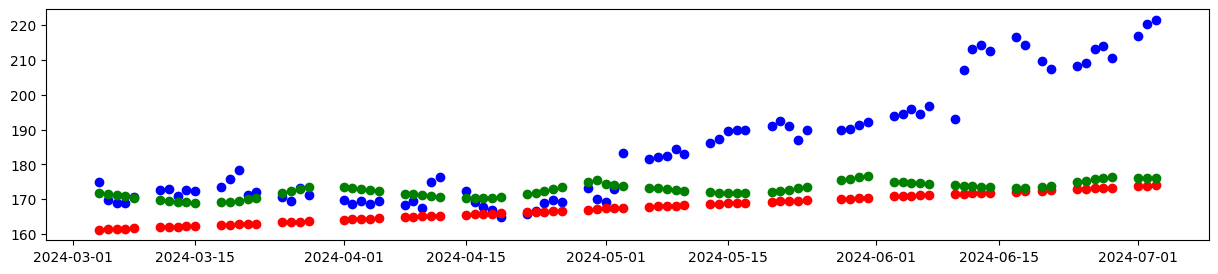

In [ ]:
plt.figure(figsize=(15,3))
plt.scatter(test.index,test['Adj Close'],color='blue')
plt.scatter(test.index,y_hat1,color='red')
plt.scatter(test.index,y_hat2,color='green')



In [ ]:
y_hat2 = pd.DataFrame(y_hat2,columns=['rbf_pred'],index=test.index)

In [ ]:
y_hat2

,rbf_pred
Date,
2024-03-04,171.782281
2024-03-05,171.441566
2024-03-06,171.106650
2024-03-07,170.780141
2024-03-08,170.465091
...,...
2024-06-27,176.066984
2024-06-28,176.467153
2024-07-01,175.972273


In [ ]:

y_hat1 = pd.DataFrame(y_hat1,columns=['lin_pred'],index=test.index)

In [ ]:
y_hat2

,rbf_pred
Date,
2024-03-04,NaN
2024-03-05,NaN
2024-03-06,NaN
2024-03-07,NaN
2024-03-08,NaN
...,...
2024-06-27,NaN
2024-06-28,NaN
2024-07-01,NaN


In [ ]:
df_1 = pd.concat([test,y_hat2],axis=1)

In [ ]:
df_1 = pd.concat([df_1,y_hat1],axis=1)

In [ ]:
df_1

,Open,High,Low,Close,Adj Close,Volume,Return,day,month,rbf_pred,lin_pred
Date,,,,,,,,,,,
2024-03-04,176.149994,176.899994,173.789993,175.100006,174.862823,81510100,-1.049988,4,3,171.782281,161.200507
2024-03-05,170.759995,172.039993,169.619995,170.119995,169.889572,95132400,-0.639999,5,3,171.441566,161.300590
2024-03-06,171.059998,171.240005,168.679993,169.119995,168.890915,68587700,-1.940002,6,3,171.106650,161.400672
2024-03-07,169.149994,170.729996,168.490005,169.000000,168.771088,71765100,-0.149994,7,3,170.780141,161.500755
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.498734,76114600,1.729996,8,3,170.465091,161.600837
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700,-0.589996,27,6,176.066984,173.182486
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700,-5.150009,28,6,176.467153,173.282569
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900,4.660004,1,7,175.972273,173.807035


In [ ]:
px.line(df_1,
        y=['Adj Close','rbf_pred','lin_pred'],
        x=df_1.index
        )